<a href="https://colab.research.google.com/github/zoe-elisa/Assigments/blob/main/AF4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 4**: *Supervised learning model: Decision tree.*
---
##### **TEAM:**
---

*   Kelly Estefanía de la Rosa Gauna ; 2048165 - 002 ; N2
*   Sebastian Tamez Rodriguez ; 2071362 - 003 ; N1
*   Fatima Zoe Elisa Juárez Barrientos ; 2004844 - 003 ; N1
*   Melissa Rojas Reséndiz ; 2132073 - 002 ; N2
*   Angel Raymundo Balderas Ledezma; 2132172 - 003 ; N1

#**INTRODUCTION**

In the following activity, a supervised learning model known as Decision Tree was developed and trained using Python programming language. The main objective of this work is to understand how decision trees work within the field of machine learning and apply it to a real dataset that comes from breast cancer tumor classification. This model in particular uses a dataset containing numerical features obtained from digitized images of breast tissue samples and whether they are malignant or benign. The performance of this decision tree will be analyzed to determine how accurately it can classify breast cancer tumors, also, the decision criteria of the model will be visualised in a graphic.

Supervised learning is a branch of machine learning that relies on labeled data to train algorithms capable of predicting outcomes for new unseen data. The decision tree is a classification technique that recursively divides the dataset based on the value of its attributes, creating a tree like model of decisions. Each node represents a decision, each branch corresponds to an outcome of that decision, and each leaf represents a class label.


# **PART ONE: IMPORT LIBRARIES AND DATA SET**

Fisrt we imported all the libraries to preform data handling, model training, evaluation and visualization. The `matplotlib.pyplot ` module was used to generate and customize the graphical representation of the decision tree. From the `sklearn.model_selection`, module we imported the *train_test_split* function to divide the dataset into training and testing subsets, allowing us to evaluate the model’s generalization ability on unseen data.

We also included the `sklearn.metrics` module which provides evaluation tools such as *accuracy_score* and *classification_report*, to quantify model performance and generate detailed evaluation reports.

Finally, the `DecisionTreeClassifier` was imported from `sklearn.tree` to build and train the classification model, while the *tree submodule* was included to enable graphical visualization of the final trained decision tree.

In [ ]:
import matplotlib.pyplot as plt # figure of decision tree
from sklearn.model_selection import train_test_split # training and test data sets
from sklearn.metrics import accuracy_score, classification_report # predictions and info
from sklearn.tree import DecisionTreeClassifier # model
from sklearn import tree # decision tree based models for classification and regression

# **PART TWO: LOAD DATA SET FROM SCIKIT-LEARN LIBRARY**

In order to load the data set, the function *load_breast_cancer*  was imported from `sklearn.datasets`; which provides access to the **Breast Cancer Wisconsin** dataset.

In [ ]:
# DATA SET
from sklearn.datasets import load_breast_cancer

The dataset, decleared as BC.data was loaded using the *load_breast_cancer()* function, which returns a structured object containing both; the data and additional information.

The attribute **data** was stored in variable X, representing the independent variables; in this case, 30 numerical features. Then, the attribute **target** was stored in variable Y; representing the dependent variable or class label, where *0* corresponds to *malignant* tumors and *1* to *benign* tumors.


In [ ]:
BCdata = load_breast_cancer()
X = BCdata.data # 30 columns -> characteristics of tumors
Y = BCdata.target # labels -> 0 = 'malignant', 1 = 'benign'

The dataset contains 569 samples in total. So we used the `BCdata.target_names` to display the names of the clases; encoding 0 for malignant and 1 for benign.

In [ ]:
BCdata.target_names

array(['malignant', 'benign'], dtype='<U9')

The `BCdata.target `command prints the numerical array of all target values, so each element corresponds to one tumor clasification sample from the dataset exported and it matches the official version.

In [ ]:

BCdata.target # Show us the numerical values of the array
# len(BCdata.target) # 569 :) -> coincide con el kaggle del dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# **PART THREE: DATA PREPROCESSING**

Decision trees do not need data normalization because they split the data based on threshold values, not on the scale of the features. This means that the size or unit of the numbers does not affect the model’s decisions. However, it was still necessary to divide the dataset into **training** and **testing** part, to check how well it performs with new data.

In this stage, the data were prepared for model training. The *train_test_split* function was used for this purpose, with 80% of the data allocated to training and 20% to testing. The parameter *random_state=42* was included to ensure reproducibility of the split, meaning that the same division will occur each time the code is executed.

In [ ]:
# Generate the training and test data sets
# 80% training and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **PART FOUR: MODEL SELECTION AND TRAINING**

A Decision Tree Classifier was selected as the model for this classification task.

The model was instantiated using the **DecisionTreeClassifier()** using default parameters and it was then trained with the training subset using the `model.fit(X_train, Y_train)`.

During this state; the decision tree laerns patterns from the data and finds the best thresholds that separate malignant and benign.

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

After training the model, we calculated its **accuracy** on the training data. The output is `1.0` wich equals to *100% accuracy* on the training set. This way we know the model correctly classified the examples.

In [ ]:
# Accuracy of the training model
train_accuracy = model.score(X_train, Y_train)
print(train_accuracy)

1.0


# **PART FIVE: MODEL TESTING**

Now we implement our model with the **testing data** and also calculate the accuracy using ```model.predict(X_test)``` to create a vector for the model predictions of our testing data; as shown in some predictions, not all of them are correct which is consistent with the accuracy of the model on the testing data which is approximately 0.93 and the classification report.

In [ ]:
Y_predictions = model.predict(X_test) # vector of the model predictions (0 = malignant, 1 = benign) for each testing sample

In [ ]:
# Prediction 1
print(Y_predictions[0])
print(Y_test[0])

1
1


In [ ]:
# Prediction 2
print(Y_predictions[20])
print(Y_test[20])

1
0


In [ ]:
# Prediction 3
print(Y_predictions[42])
print(Y_test[42])

1
1


In [ ]:
# Prediction 4
print(Y_predictions[-15])
print(Y_test[-15])

0
0


In [ ]:
# Prediction 5
print(Y_predictions[100])
print(Y_test[100])

0
0


In [ ]:
accuracy_model = accuracy_score(Y_test, Y_predictions)
print("Accuracy of the model:", accuracy_model)
print("Classification Report:\n", classification_report(Y_test, Y_predictions, target_names=BCdata.target_names))

Accuracy of the model: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        43
      benign       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# **PART SIX: DECISION TREE VISUALIZATION**

After training and testing the model, this section helps to visualize the structure of the decision tree and to understand how the model makes its classifications.

The `plt.figure(figsize=(20, 15))` was used to create the figure and set the size for better resolution. Then the `tree.plot_tree(model, filled=True, feature_names=BCdata.feature_names, class_names=BCdata.target_names)` draws the decision tree, put the labels of each class in the output and it also colors the nodes depending on the predominant class using filled=True command.

We also use `plt.title()` to add the title to the `figure; plt.savefig("decision_tree.png", dpi=300)` to save the visualisation as a HR image file and finally for displaying the decision tree, we use plt.show().




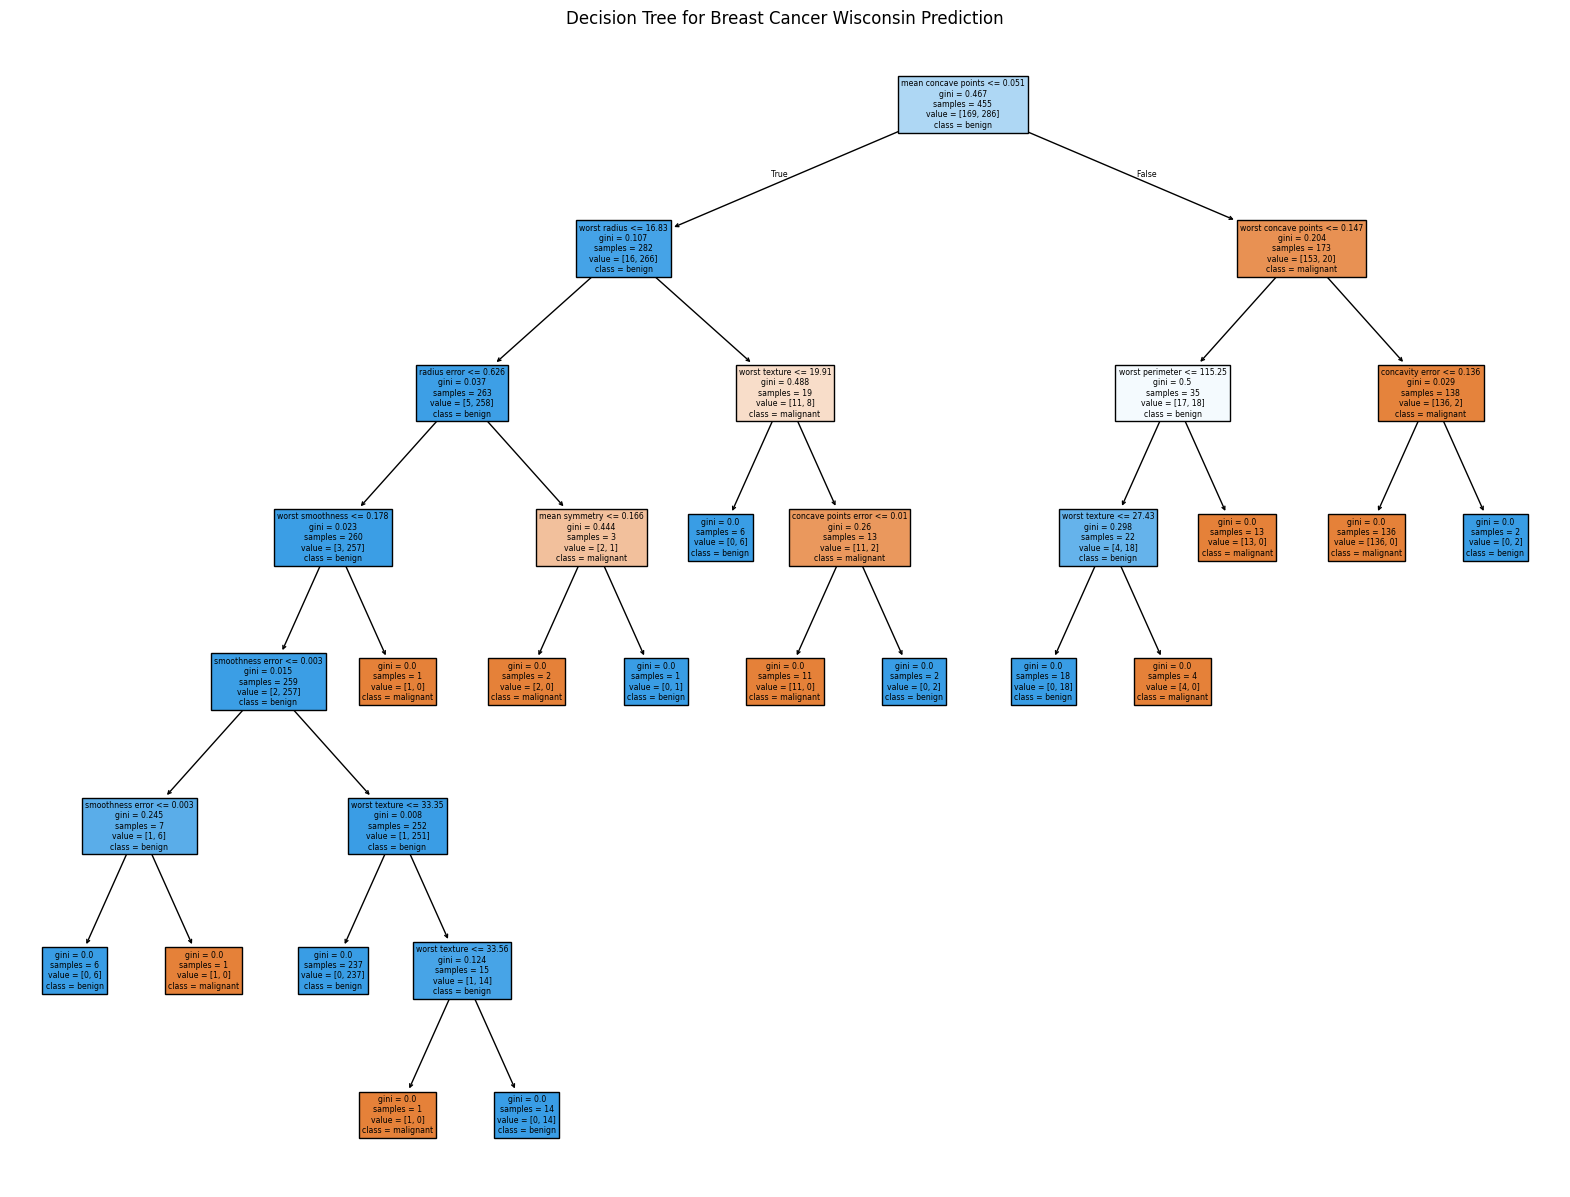

In [ ]:
plt.figure(figsize=(20, 15))  # Increase figure size for better resolution
tree.plot_tree(model, filled=True, feature_names=BCdata.feature_names, class_names=BCdata.target_names)
plt.title("Decision Tree for Breast Cancer Wisconsin Prediction")
plt.savefig("decision_tree.png", dpi=300)  # Increase DPI for better resolution
plt.show()